# University of Kelaniya  
## Department of Finance  

---

###  Course: BBFE 31382 - Computing for Finance  
###  Year: 3rd year 1st semester
###  Date: 17/05/2025

---

##  Individual Assignment: Portfolio Optimization using Python  

**Student Name:** Kavini Hasanga Gamalath  
**Student ID:** FE/2021/047 

---

###  Tasks Covered:
- **Task 1:** Data Collection & Preprocessing  
- **Task 2:** Expected Returns & Risk Calculation  
- **Task 3:** Monte Carlo Simulation and Efficient Frontier Visualization  
- **Task 4:** Portfolio Optimization using `scipy.optimize`
- **Task 5:** Analysis & Report - Interpretation of results, comparison of optimized portfolios, and insights on investor suitability    

---

###  Tools & Libraries Used:
- `yfinance` for data collection  
- `numpy`, `pandas` for data manipulation  
- `matplotlib` for data visualization  
- `scipy.optimize` for portfolio optimization  

---


## Task 1: Data Collection & Preprocessing

For this assignment, I selected **5 companies from diverse sectors** to ensure a balanced and realistic portfolio analysis:

- **JPMorgan Chase (JPM)** → Financial Sector
- **Johnson & Johnson (JNJ)** → Healthcare Sector
- **The Walt Disney Company (DIS)** → Entertainment Sector
- **Boeing (BA)** → Aerospace Sector
- **Exxon Mobil (XOM)** → Energy Sector

### Reason for Selection:
- Covers multiple industries for diversification.
- Reduces unsystematic risk through sector balance.
- Common large-cap stocks with reliable historical data.

### Preprocessing Steps:
1. Fetched **5 years of daily data** using `yfinance`.
2. Extracted **'Adj Close' prices** to reflect true asset value.
3. **Handled missing data** by dropping NaNs for clean analysis.
4. Computed **daily returns** using `.pct_change()` method.


In [ ]:
# ----------------------#
# Task 1: Data Collection & Preprocessing
# ----------------------#

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Select 5 diverse stocks from major stock market index

# JPMorgan Chase (JPM)- Financial Sector
# Johnson & Johnson (JNJ)- Healthcare Sector
# The Walt Disney Company (DIS)- Entertainment Sector
# Boeing (BA)- Aerospace Sector
# Exxon Mobil (XOM)- Energy Sector

tickers = ['JPM', 'JNJ', 'DIS', 'BA', 'XOM']

# Step 2: Download historical stock data (5 years) with auto_adjust=True
try:
    data = yf.download(tickers, start="2020-05-01", end="2025-05-01", auto_adjust=True)
except Exception as e:
    print("Error fetching data:", e)
    raise

# Step 3:Directly extract 'Close' prices (already adjusted due to auto_adjust=True)
adj_close = data['Close']

# Step 4: Calculate Daily Returns and drop the first NaN
returns = adj_close.pct_change().dropna()

# Step 5: Display Outputs Nicely
print("\n--- Adjusted Close Prices (Last 5 Rows) ---")
display(adj_close.tail())

print("\n--- Daily Returns (Last 5 Rows) ---")
display(returns.tail())

# Step 6: Summary Info
print(f"\nAdjusted Close Data Shape: {adj_close.shape}")
print(f"Returns Data Shape: {returns.shape}")
print("\nData Info:")
display(adj_close.info())

print("\nBasic Statistics for Adjusted Close Prices:")
display(adj_close.describe())


[*********************100%***********************]  5 of 5 completed


--- Adjusted Close Prices (Last 5 Rows) ---


Ticker,BA,DIS,JNJ,JPM,XOM
Date,,,,,
2025-04-24,176.259995,90.010002,154.929993,244.639999,107.638626
2025-04-25,177.949997,90.279999,154.580002,243.550003,107.579178
2025-04-28,182.300003,90.160004,155.350006,243.220001,107.638626
2025-04-29,182.000000,91.169998,155.910004,244.619995,107.371094
2025-04-30,183.240005,90.949997,156.309998,244.619995,104.666008



--- Daily Returns (Last 5 Rows) ---


Ticker,BA,DIS,JNJ,JPM,XOM
Date,,,,,
2025-04-24,0.022568,0.031161,-0.002896,0.015609,0.011735
2025-04-25,0.009588,0.003000,-0.002259,-0.004456,-0.000552
2025-04-28,0.024445,-0.001329,0.004981,-0.001355,0.000553
2025-04-29,-0.001646,0.011202,0.003605,0.005756,-0.002485
2025-04-30,0.006813,-0.002413,0.002566,0.000000,-0.025194



Adjusted Close Data Shape: (1256, 5)
Returns Data Shape: (1255, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-05-01 to 2025-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      1256 non-null   float64
 1   DIS     1256 non-null   float64
 2   JNJ     1256 non-null   float64
 3   JPM     1256 non-null   float64
 4   XOM     1256 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


None


Basic Statistics for Adjusted Close Prices:


Ticker,BA,DIS,JNJ,JPM,XOM
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,190.977007,119.855522,149.764989,147.853954,80.212180
std,31.570357,32.227594,10.445044,45.472523,29.141291
min,115.860001,78.352066,120.597572,73.119774,25.651487
25%,168.844997,94.498192,144.480076,119.205891,51.559509
50%,189.629997,109.574997,151.172493,138.203590,93.191006
75%,213.309998,140.790707,156.619701,168.231792,105.054098
max,269.190002,199.446121,170.243546,278.236206,122.121063


## Task 2: Expected Returns & Risk Calculation

### Key Metrics Computed:
1. **Annualized Mean Returns**: 
   - Average expected yearly return for each stock.
   - Calculated by multiplying daily returns mean by 252 trading days.

2. **Annualized Covariance Matrix**:
   - Measures how each stock’s returns move in relation to others.
   - Important for understanding portfolio risk (diversification impact).

3. **Simulated Portfolio Statistics**:
   - Generated random weights (sum to 1) to simulate a sample portfolio.
   - Calculated:
     - **Expected Portfolio Return** (weighted mean returns).
     - **Portfolio Volatility (Standard Deviation)** (weighted covariance impact).

### Why it Matters:
- Helps in analyzing how individual stock performances and their correlations impact overall portfolio risk & returns.
- Foundation for optimization (Task 3 & 4).


In [ ]:
# ----------------------#
# Task 2: Expected Returns & Risk Calculation
# ----------------------#

import numpy as np

# Step 1: Calculate Annualized Mean Returns
# 252 trading days per year assumed
mean_returns = returns.mean() * 252

# Step 2: Calculate Annualized Covariance Matrix of returns
cov_matrix = returns.cov() * 252

# Step 3: Simulate a Basic Portfolio with Random Weights (must sum to 1)
weights = np.random.random(len(tickers))
weights /= np.sum(weights)

# Step 4: Calculate Expected Portfolio Return & Volatility
port_return = np.dot(weights, mean_returns)
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Step 5: Display Results in Clean Tables
print(" Annualized Mean Returns (%):")
display(mean_returns.to_frame(name='Annualized Mean Return').style.format("{:.2%}"))

print(" Annualized Covariance Matrix:")
display(cov_matrix.style.format("{:.4f}"))

print(f" Simulated Portfolio Return: {port_return:.2%}")
print(f" Simulated Portfolio Volatility: {port_volatility:.2%}")

print("\n Portfolio Weights Used:")
for ticker, weight in zip(tickers, weights):
    print(f" {ticker}: {weight:.2%}")


 Annualized Mean Returns (%):


,Annualized Mean Return
Ticker,
BA,15.43%
DIS,2.12%
JNJ,5.28%
JPM,25.84%
XOM,27.45%


 Annualized Covariance Matrix:


Ticker,BA,DIS,JNJ,JPM,XOM
Ticker,,,,,
BA,0.1823,0.0618,0.0095,0.0599,0.0533
DIS,0.0618,0.0975,0.0084,0.0420,0.0348
JNJ,0.0095,0.0084,0.0280,0.0111,0.0097
JPM,0.0599,0.0420,0.0111,0.0740,0.0401
XOM,0.0533,0.0348,0.0097,0.0401,0.0942


 Simulated Portfolio Return: 15.24%
 Simulated Portfolio Volatility: 22.32%

 Portfolio Weights Used:
 JPM: 33.32%
 JNJ: 6.35%
 DIS: 28.18%
 BA: 21.60%
 XOM: 10.54%


## Task 3: Monte Carlo Simulation

### Objective:
- Simulate 10,000 different portfolio allocations to visualize risk-return trade-offs.
- Highlight the **Efficient Frontier** — portfolios offering the highest return for each level of risk.

### Process:
1. **Random Weight Allocation**:
   - Generated 10,000 random portfolios ensuring weights sum to 1.
   
2. **Portfolio Metrics Calculated**:
   - **Expected Return** (weighted mean returns).
   - **Portfolio Volatility** (standard deviation using covariance matrix).
   - **Sharpe Ratio** (risk-adjusted return, using 2% risk-free rate).

3. **Efficient Frontier Visualization**:
   - Scatter plot: 
     - X-axis: Portfolio Volatility.
     - Y-axis: Expected Return.
     - Color: Sharpe Ratio intensity.
   - Shows the trade-off between risk and reward visually.

### Why Important:
- Investors can identify portfolios with optimal risk-reward balances.
- Foundational to selecting best portfolios in Task 4.


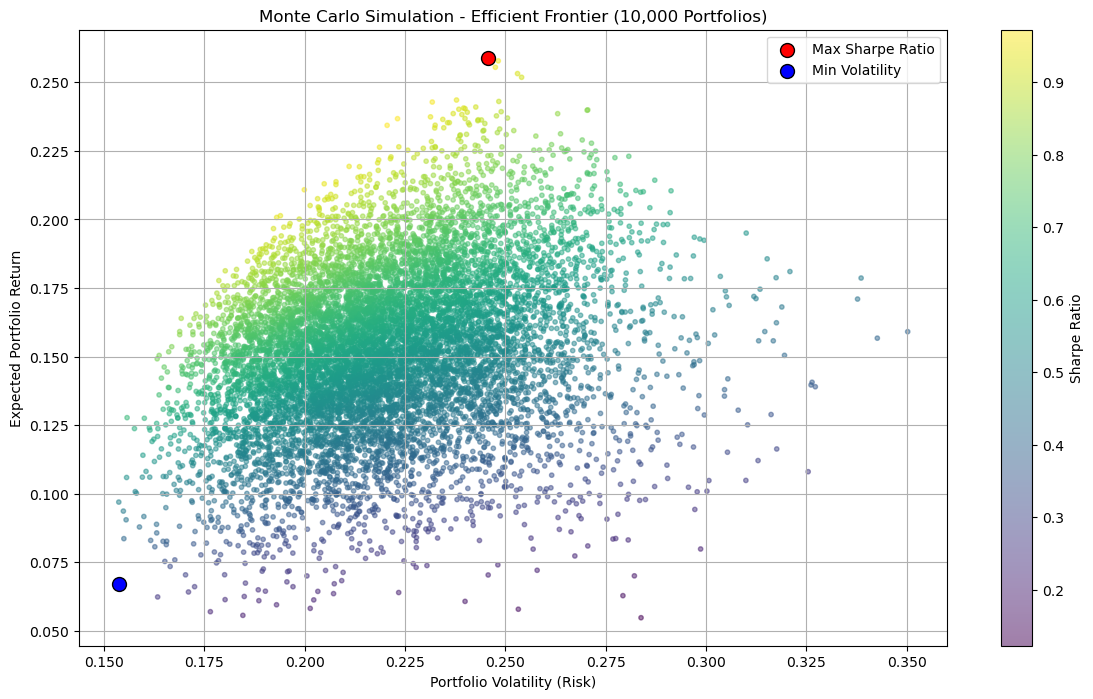


Max Sharpe Ratio Portfolio Metrics:
  Return: 25.90%
  Volatility: 24.57%
  Sharpe Ratio: 0.97
  Weights:
    JPM: 2.54%
    JNJ: 0.59%
    DIS: 1.63%
    BA: 45.65%
    XOM: 49.58%

Min Volatility Portfolio Metrics:
  Return: 6.71%
  Volatility: 15.36%
  Sharpe Ratio: 0.31
  Weights:
    JPM: 2.05%
    JNJ: 16.22%
    DIS: 73.32%
    BA: 7.80%
    XOM: 0.61%


In [ ]:
# -----------------------------#
# Task 3: Monte Carlo Simulation for Efficient Frontier
# -----------------------------#

import numpy as np
import matplotlib.pyplot as plt

# Use previously defined variables from Task 2:
# - mean_returns
# - cov_matrix
# - tickers

# Step 1: Parameters
num_portfolios = 10000
risk_free_rate = 0.02  # 2% risk-free rate as per assignment

# Step 2: Arrays to store simulation results
results = np.zeros((3, num_portfolios))  # Rows: Return, Volatility, Sharpe Ratio
weights_record = []

# Step 3: Monte Carlo Simulation Loop
for i in range(num_portfolios):
    # Step 3.1: Generate random weights that sum to 1
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Step 3.2: Calculate expected return and volatility for the portfolio
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Step 3.3: Calculate Sharpe Ratio
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    
    # Step 3.4: Store results
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio

# Step 4: Plotting the Efficient Frontier
plt.figure(figsize=(14, 8))
scatter = plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.title('Monte Carlo Simulation - Efficient Frontier (10,000 Portfolios)')
plt.xlabel('Portfolio Volatility (Risk)')
plt.ylabel('Expected Portfolio Return')
plt.grid(True)

# Step 5: Highlight Max Sharpe Ratio Portfolio
max_sharpe_idx = np.argmax(results[2])
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', s=100, edgecolors='black', label='Max Sharpe Ratio')

# Step 6: Highlight Min Volatility Portfolio
min_vol_idx = np.argmin(results[1])
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], c='blue', s=100, edgecolors='black', label='Min Volatility')

plt.legend()
plt.show()

# Step 7: display portfolio details
print(f"\nMax Sharpe Ratio Portfolio Metrics:")
print(f"  Return: {results[0, max_sharpe_idx]:.2%}")
print(f"  Volatility: {results[1, max_sharpe_idx]:.2%}")
print(f"  Sharpe Ratio: {results[2, max_sharpe_idx]:.2f}")
print("  Weights:")
for ticker, weight in zip(tickers, weights_record[max_sharpe_idx]):
    print(f"    {ticker}: {weight:.2%}")

print(f"\nMin Volatility Portfolio Metrics:")
print(f"  Return: {results[0, min_vol_idx]:.2%}")
print(f"  Volatility: {results[1, min_vol_idx]:.2%}")
print(f"  Sharpe Ratio: {results[2, min_vol_idx]:.2f}")
print("  Weights:")
for ticker, weight in zip(tickers, weights_record[min_vol_idx]):
    print(f"    {ticker}: {weight:.2%}")


## Task 4: Portfolio Optimization

### Objectives:
- Find **optimal portfolio weights** to:
  -  Maximize Sharpe Ratio (best risk-adjusted returns).
  -  Minimize Portfolio Variance (lowest possible risk).

### Methodology:
1. **Sharpe Ratio Optimization**:
   - Used `scipy.optimize.minimize` to maximize Sharpe Ratio.
   - Objective function: minimize **negative Sharpe Ratio**.
   - Constraints: weights sum to 1, no short-selling.

2. **Minimum Variance Portfolio**:
   - Objective: minimize portfolio volatility.
   - Same constraints applied.

3. **Optimization Technique**:
   - Method: `SLSQP` (Sequential Least Squares Programming).
   - Common in constrained portfolio optimization.

### Results:
- Produced two optimal portfolios:
  - **Max Sharpe Ratio Portfolio**: Best trade-off between return & risk.
  - **Minimum Variance Portfolio**: Safest allocation with least volatility.

### Importance:
- This is the core of **Modern Portfolio Theory (MPT)**.
- Helps investors choose between aggressive (high Sharpe) or conservative (low risk) portfolios.



Optimized Portfolio Allocations:


,Stock,Max Sharpe Ratio Weights,Min Variance Weights
0,JPM,0.00%,0.00%
1,JNJ,0.00%,10.00%
2,DIS,0.00%,71.43%
3,BA,56.95%,9.52%
4,XOM,43.05%,9.05%



Portfolio Performance Summary:


,Portfolio,Expected Return,Volatility,Sharpe Ratio
0,Max Sharpe Ratio,26.53%,24.72%,0.99
1,Min Variance,8.93%,15.10%,0.46


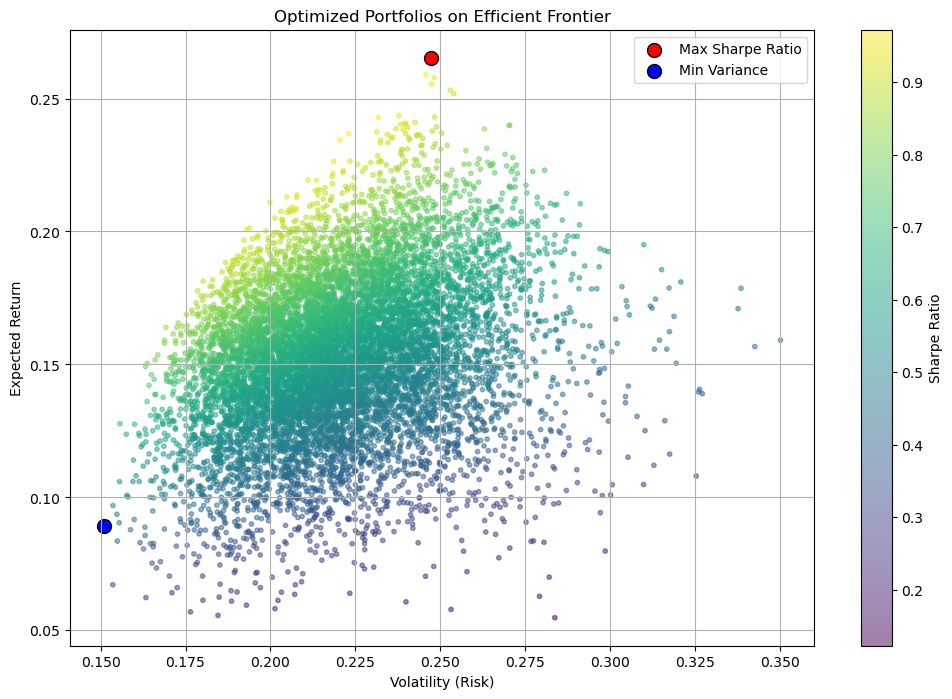

In [ ]:
# -----------------------------#
# Task 4: Portfolio Optimization
# -----------------------------#

from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Already defined from Task 1 ,2 & 3
# tickers, mean_returns, cov_matrix, results

risk_free_rate = 0.02  # 2% risk-free rate

# Step 1: Function to Calculate Portfolio Performance
def portfolio_metrics(weights, mean_returns, cov_matrix, risk_free_rate):
    ret = np.dot(weights, mean_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (ret - risk_free_rate) / vol
    return ret, vol, sharpe

# Step 2: Objective Function to Maximize Sharpe Ratio (minimize negative Sharpe)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_metrics(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Step 3: Objective Function for Minimum Variance Portfolio
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_metrics(weights, mean_returns, cov_matrix, 0)[1]

# Step 4: Constraints & Bounds
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights must sum to 1
bounds = tuple((0, 1) for _ in tickers)  # No short selling

# Step 5: Initial Guess (Equal allocation)
init_guess = len(tickers) * [1. / len(tickers)]

# Step 6: Optimization for Maximum Sharpe Ratio Portfolio
opt_sharpe = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Step 7: Optimization for Minimum Variance Portfolio
opt_min_var = minimize(portfolio_volatility, init_guess,
                       args=(mean_returns, cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints)

# Step 8: Get Optimized Metrics
max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio = portfolio_metrics(opt_sharpe.x, mean_returns, cov_matrix, risk_free_rate)
min_var_return, min_var_volatility, min_var_sharpe = portfolio_metrics(opt_min_var.x, mean_returns, cov_matrix, risk_free_rate)

# Step 9: Display Optimized Portfolios
comparison_df = pd.DataFrame({
    'Stock': tickers,
    'Max Sharpe Ratio Weights': opt_sharpe.x,
    'Min Variance Weights': opt_min_var.x
})

portfolio_summary = pd.DataFrame({
    'Portfolio': ['Max Sharpe Ratio', 'Min Variance'],
    'Expected Return': [max_sharpe_return, min_var_return],
    'Volatility': [max_sharpe_volatility, min_var_volatility],
    'Sharpe Ratio': [max_sharpe_ratio, min_var_sharpe]
})

# Step 10: Display Optimized Portfolios Table
print("\nOptimized Portfolio Allocations:")
display(comparison_df.style.format({
    'Max Sharpe Ratio Weights': "{:.2%}",
    'Min Variance Weights': "{:.2%}"
}))

# Step 11: Display Portfolio Performance Summary Table
print("\nPortfolio Performance Summary:")
display(portfolio_summary.style.format({
    'Expected Return': "{:.2%}",
    'Volatility': "{:.2%}",
    'Sharpe Ratio': "{:.2f}"
}))

# Step 12: Plot Efficient Frontier and mark optimized points
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', s=100, edgecolors='black', label='Max Sharpe Ratio')
plt.scatter(min_var_volatility, min_var_return, c='blue', s=100, edgecolors='black', label='Min Variance')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Optimized Portfolios on Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()
